# Projeto de Melhoria Contínua utilizando Lean Six Sigma (DMAIC)

## Contexto

Este é um projeto fictício desenvolvido com fins de estudo e demonstração de habilidades relacionadas ao **Lean Six Sigma**, focando na aplicação prática do roteiro **DMAIC** (Definir, Medir, Analisar, Melhorar e Controlar). A finalidade deste trabalho é demonstrar minhas competências na análise de dados e melhoria de processos, utilizando dados extraídos do **Kaggle**.

## Dataset

Os dados utilizados para este estudo foram obtidos na plataforma Kaggle e estão disponíveis no seguinte link: [Customer Service Chat Data - 30k rows](https://www.kaggle.com/datasets/aimack/customer-service-chat-data-30k-rows). O dataset contém informações sobre atendimentos realizados via chat, incluindo variáveis como o tempo de atendimento, tempo de resposta, nota de satisfação do cliente e tempo de espera.

## Objetivo do Projeto

O objetivo principal deste projeto é aplicar o método DMAIC para otimizar processos de atendimento ao cliente, utilizando dados para identificar oportunidades de melhoria. Ao longo deste estudo, serão analisados diferentes aspectos do atendimento via chat e propostas melhorias hipotéticas com base nas conclusões obtidas.

Este trabalho faz parte do meu Portfólio de Habilidades hospedado no GitHub, para o tópico de **Melhoria Contínua**, e visa demonstrar habilidades analíticas e de tomada de decisão com base em dados.

---

**Nota**: Este é um estudo fictício, e as propostas de melhoria apresentadas são baseadas em análise de dados simulados, sem aplicação prática em um ambienteeal.
de negócios real.


In [3]:
import pandas as pd

# Carregar o arquivo Excel da pasta do projeto
data = pd.read_excel('chat_data.xlsx')

# Exibir as primeiras linhas do dataset
data.head()


Transaction Start Date     Agent Chat Duration                  Teams  \
0    2018-06-08 23:59:00      Zaha      00:18:22    Mobile Service Team   
1    2018-06-08 23:59:00  Berenice      00:03:05  Mobile Technical Team   
2    2018-06-08 23:59:00      Madi      00:22:33    Mobile Service Team   
3    2018-06-08 23:59:00      Rose      00:38:20    Mobile Service Team   
4    2018-06-08 23:59:00    Sarrah      00:11:50     Fixed Service Team   

               Session Name  Chat Closed By  Interactive Chat         Browser  \
0  Session:2057187615:23360        Customer              True   Edge 16.16299   
1  Session:2057187614:23368  Representative             False            Edge   
2  Session:2057187615:23358        Customer              True  c~67.0.3396.87   
3  Session:2057187616:18361          System              True           Other   
4   Session:2057187617:2598  Representative              True           Other   

  Operating System        Geo Response Time of Agent Response time of Visitor  \
0       Windows-10     Sweden               00:01:02                 00:00:43   
1          Windows  Australia               00:00:00                 00:00:00   
2      Android-4.3  Australia               00:00:32                 00:01:28   
3           11.4.1        NaN               00:00:37                 00:01:18   
4    Android 8.1.0        NaN               00:00:21                 00:00:38   

  Transaction End Date Customer Rating Customer Comment  Transferred Chat  \
0  2018-07-08 00:18:00                                              False   
1  2018-07-08 00:02:00                                               True   
2  2018-07-08 00:26:00                                              False   
3  2018-07-08 00:38:00                                              False   
4  2018-07-08 00:14:00                                              False   

  Customer Wait Time                                               Text  
0           00:00:01  I would really like to know the criteria which...  
1           00:01:01                                                NaN  
2           00:00:01                                                NaN  
3           00:00:01   Just wondered which airline would give any so...  
4           00:00:01      Do they offer lunch or should we eat outside?

In [5]:
# Verificar os tipos de dados em cada coluna
data_types = data.dtypes

# Verificar a quantidade de valores ausentes em cada coluna
missing_values = data.isnull().sum()

# Resumo dos tipos de dados e valores ausentes
data_info = pd.DataFrame({'Data Type': data_types, 'Missing Values': missing_values})

# Exibir o resumo
data_info


Data Type  Missing Values
Transaction Start Date    datetime64[ns]               0
Agent                             object               0
Chat Duration                     object               0
Teams                             object               0
Session Name                      object               0
Chat Closed By                    object             211
Interactive Chat                    bool               0
Browser                           object               0
Operating System                  object               0
Geo                               object           14287
Response Time of Agent            object               0
Response time of Visitor          object               0
Transaction End Date      datetime64[ns]               0
Customer Rating                   object               0
Customer Comment                  object               0
Transferred Chat                    bool               0
Customer Wait Time                object               0
Text                              object             819

In [7]:
# Definir as colunas que precisam ser convertidas para timedelta
timedelta_columns = ['Chat Duration', 'Response Time of Agent', 'Customer Wait Time']  # Ajuste conforme necessário

# Função para limpar e converter colunas para timedelta
def clean_and_convert_to_timedelta(df, column_name):
    # Remove qualquer entrada que não seja um número ou 'days'
    df[column_name] = df[column_name].astype(str).replace(r'[^0-9d: ]', '', regex=True)
    # Substituir entradas que não são convertíveis por '0 days'
    df[column_name] = df[column_name].replace('', '0 days')  # Isso lida com strings vazias
    df[column_name] = df[column_name].replace('0', '0 days')  # Isso lida com zeros soltos
    df[column_name] = pd.to_timedelta(df[column_name], errors='coerce')  # Converte para timedelta, convertendo erros para NaT
    return df

# Limpar e ajustar as colunas para timedelta
for column in timedelta_columns:
    data = clean_and_convert_to_timedelta(data, column)

# Verificando os tipos das colunas após a conversão
print(data.dtypes)


Transaction Start Date       datetime64[ns]
Agent                                object
Chat Duration               timedelta64[ns]
Teams                                object
Session Name                         object
Chat Closed By                       object
Interactive Chat                       bool
Browser                              object
Operating System                     object
Geo                                  object
Response Time of Agent      timedelta64[ns]
Response time of Visitor             object
Transaction End Date         datetime64[ns]
Customer Rating                      object
Customer Comment                     object
Transferred Chat                       bool
Customer Wait Time          timedelta64[ns]
Text                                 object
dtype: object


In [9]:
# Descrição estatística do dataset
data.describe(include='all')  # Include='all' para descrever também colunas não numéricas


Transaction Start Date  Agent              Chat Duration  \
count                           31952  31952                      31952   
unique                            NaN   1033                        NaN   
top                               NaN   John                        NaN   
freq                              NaN    190                        NaN   
mean    2018-06-08 14:46:58.593515264    NaN  0 days 00:17:29.669879819   
min               2018-06-08 00:00:00    NaN            0 days 00:00:00   
25%               2018-06-08 11:24:00    NaN            0 days 00:04:06   
50%               2018-06-08 14:53:00    NaN            0 days 00:13:06   
75%               2018-06-08 18:25:00    NaN            0 days 00:24:18   
max               2018-06-08 23:59:00    NaN            0 days 04:12:45   
std                               NaN    NaN  0 days 00:17:14.296660559   

                      Teams              Session Name Chat Closed By  \
count                 31952                     31952          31741   
unique                    6                     31952              3   
top     Mobile Service Team  Session:2057187615:23360       Customer   
freq                  16688                         1          13375   
mean                    NaN                       NaN            NaN   
min                     NaN                       NaN            NaN   
25%                     NaN                       NaN            NaN   
50%                     NaN                       NaN            NaN   
75%                     NaN                       NaN            NaN   
max                     NaN                       NaN            NaN   
std                     NaN                       NaN            NaN   

       Interactive Chat Browser Operating System        Geo  \
count             31952   31952            31952      17665   
unique                2     341              167         62   
top                True   Other            MacOS  Australia   
freq              24659   16489             4419      16636   
mean                NaN     NaN              NaN        NaN   
min                 NaN     NaN              NaN        NaN   
25%                 NaN     NaN              NaN        NaN   
50%                 NaN     NaN              NaN        NaN   
75%                 NaN     NaN              NaN        NaN   
max                 NaN     NaN              NaN        NaN   
std                 NaN     NaN              NaN        NaN   

           Response Time of Agent Response time of Visitor  \
count                       31928                    31952   
unique                        NaN                      300   
top                           NaN                 00:00:00   
freq                          NaN                     7305   
mean    0 days 00:00:32.468460285                      NaN   
min               0 days 00:00:00                      NaN   
25%               0 days 00:00:13                      NaN   
50%               0 days 00:00:33                      NaN   
75%               0 days 00:00:48                      NaN   
max               0 days 00:07:16                      NaN   
std     0 days 00:00:24.775666044                      NaN   

                 Transaction End Date Customer Rating Customer Comment  \
count                           31952           31952            31952   
unique                            NaN              12                6   
top                               NaN                                    
freq                              NaN           27145            27121   
mean    2018-06-08 19:48:52.576990464             NaN              NaN   
min               2018-06-08 00:02:00             NaN              NaN   
25%               2018-06-08 11:46:00             NaN              NaN   
50%               2018-06-08 15:15:00             NaN              NaN   
75%               2018-06-08 18:47:00             NaN              NaN   
max    

In [11]:
print(data['Response time of Visitor'].dtype)


object


In [13]:
# Verifique os primeiros valores da coluna para entender o formato
print(data['Response time of Visitor'].head())



0    00:00:43
1    00:00:00
2    00:01:28
3    00:01:18
4    00:00:38
Name: Response time of Visitor, dtype: object


In [15]:
import pandas as pd
import datetime

# Inspecionar os primeiros valores da coluna 'Response time of Visitor'
print(data['Response time of Visitor'].head())

# Função para converter diferentes tipos para timedelta
def convert_to_timedelta(value):
    if isinstance(value, datetime.time):  # Se for do tipo datetime.time
        return pd.to_timedelta(datetime.datetime.combine(datetime.date.min, value) - datetime.datetime.min)
    elif isinstance(value, str):  # Se for string
        try:
            # Se a string representar um tempo, você pode tentar convertê-la
            return pd.to_timedelta(value)  # Isso funciona se a string estiver em um formato adequado
        except ValueError:
            return pd.NaT  # Retorna NaT se não for possível converter
    else:
        return pd.NaT  # Retorna NaT para outros tipos

# Aplica a função à coluna 'Response time of Visitor'
data['Response time of Visitor'] = data['Response time of Visitor'].apply(convert_to_timedelta)

# Verifique o tipo de dado da coluna após a conversão
print(data['Response time of Visitor'].dtype)

# Verifique os dados após a conversão
print(data['Response time of Visitor'].head())



0    00:00:43
1    00:00:00
2    00:01:28
3    00:01:18
4    00:00:38
Name: Response time of Visitor, dtype: object
timedelta64[ns]
0   0 days 00:00:43
1   0 days 00:00:00
2   0 days 00:01:28
3   0 days 00:01:18
4   0 days 00:00:38
Name: Response time of Visitor, dtype: timedelta64[ns]


# Limpeza dos Dados e Preparação para Análise

Nesta etapa, realizamos a limpeza e o pré-processamento dos dados, que incluíram as seguintes atividades:

1. **Verificação de Tipos de Dados**: Identificamos e confirmamos os tipos de dados para cada coluna do dataset, garantindo que estavam corretos para as análises subsequentes.

2. **Conversão de Tipos de Dados**: Ajustamos as colunas que representam durações de tempo (como 'Chat Duration', 'Response Time of Agent', 'Response Time of Visitor' e 'Customer Wait Time') para o tipo `timedelta`, permitindo cálculos adequados e análises relacionadas ao tempo.

3. **Tratamento de Valores Nulos**: Embora não tenhamos realizado nenhuma ação específica nesta etapa, é importante observar que verificamos a presença de valores nulos e garantimos que os dados estavam em um formato adequado.

Com os dados limpos e prontos, iniciaremos a Análise Exploratória de Dados (EDA). Essa fase é crucial para entender os padrões e insights que os dados podem fornecer, preparando o terreno para as etapas seguintes do método DMAIC.
Definir).


# Análise Exploratória de Dados (EDA)

Nesta seção, realizaremos a Análise Exploratória de Dados (EDA) para entender melhor o dataset e identificar possíveis temas para a etapa de **Definir** do processo DMAIC. O objetivo da EDA é explorar as características dos dados, buscando padrões, tendências e anomalias que possam indicar áreas de melhoria.

As atividades que iremos seguir incluem:

1. **Descrição Estatística dos Dados**: Apresentaremos uma visão geral das principais métricas descritivas, como média, mediana e desvio padrão, para entender a distribuição das variáveis.

2. **Verificação de Valores Nulos**: Analisaremos a presença de valores nulos em diferentes colunas, garantindo a integridade dos dados para a análise.

3. **Visualizações de Distribuição das Variáveis**: Criaremos gráficos que ilustrarão a distribuição das variáveis relevantes, permitindo uma compreensão visual dos dados e ajudando a identificar padrões.

4. **Análise de Correlação entre Variáveis**: Investigaremos as relações entre variáveis importantes, buscando identificar correlações que podem influenciar a satisfação do cliente e o tempo de espera.

Essa análise é fundamental para identificar problemas e oportunidades de melhoria, que serão definidos na próxima etapa do DMAIC.


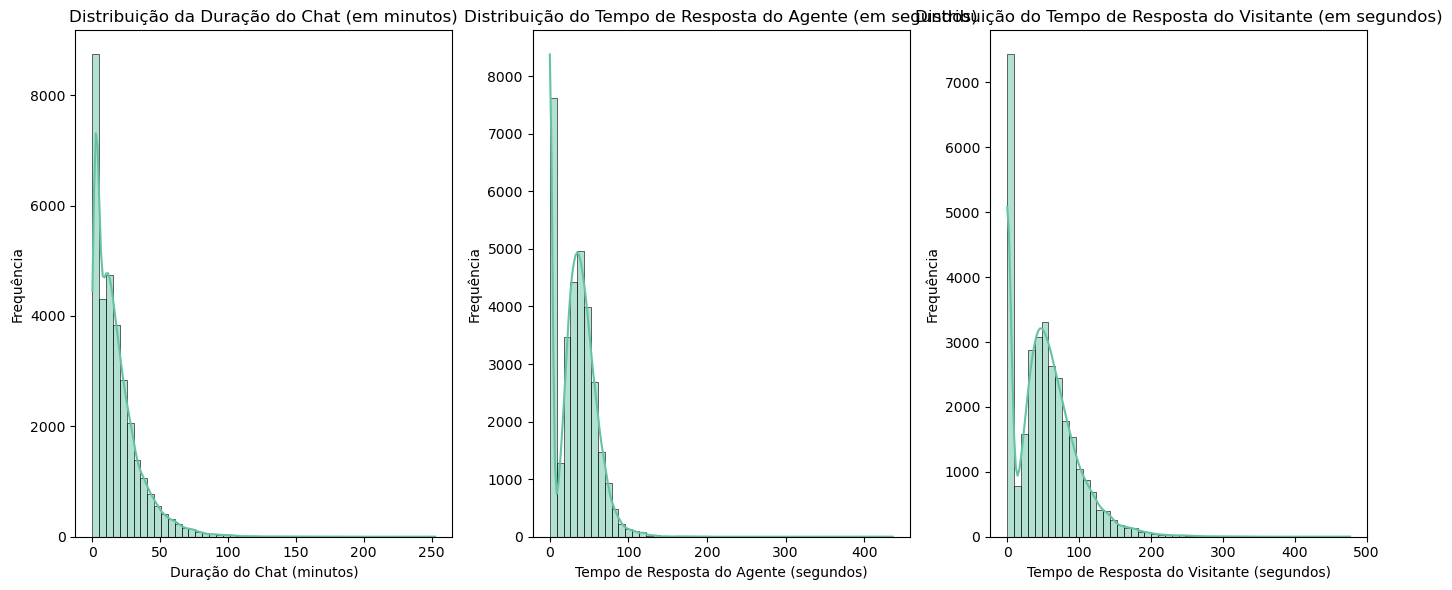

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para os gráficos
sns.set_palette('Set2')

# Histogramas para as durações dos chats e tempos de resposta
plt.figure(figsize=(14, 6))

# Chat Duration
plt.subplot(1, 3, 1)
sns.histplot(data['Chat Duration'].dt.total_seconds() / 60, bins=50, kde=True)
plt.title('Distribuição da Duração do Chat (em minutos)')
plt.xlabel('Duração do Chat (minutos)')
plt.ylabel('Frequência')

# Response Time of Agent
plt.subplot(1, 3, 2)
sns.histplot(data['Response Time of Agent'].dt.total_seconds(), bins=50, kde=True)
plt.title('Distribuição do Tempo de Resposta do Agente (em segundos)')
plt.xlabel('Tempo de Resposta do Agente (segundos)')
plt.ylabel('Frequência')

# Response Time of Visitor
plt.subplot(1, 3, 3)
sns.histplot(data['Response time of Visitor'].dt.total_seconds(), bins=50, kde=True)
plt.title('Distribuição do Tempo de Resposta do Visitante (em segundos)')
plt.xlabel('Tempo de Resposta do Visitante (segundos)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()



[' ' 10 8 2 0 5 7 4 6 9 1 3]


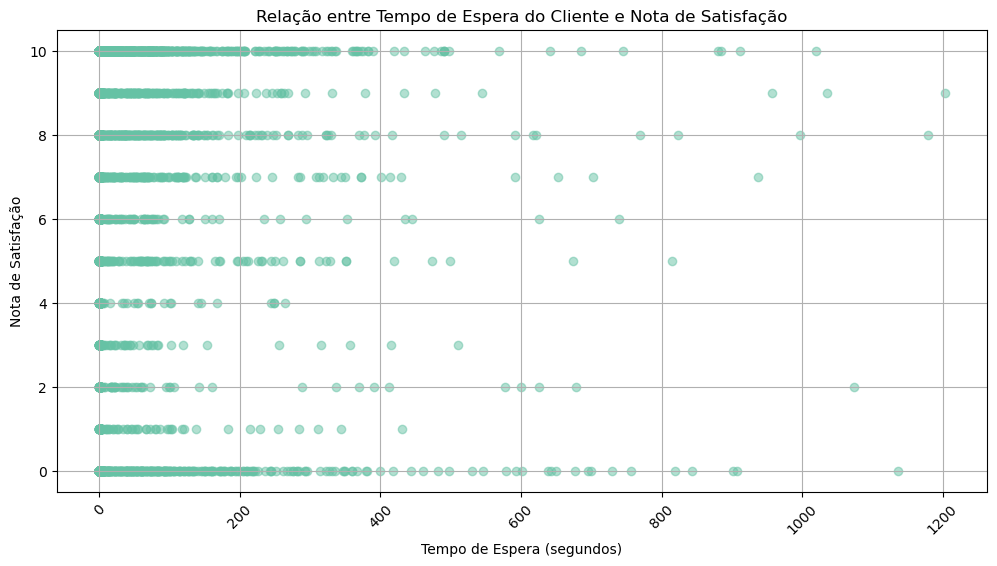

In [21]:
# Verificando valores únicos na coluna 'Customer Rating'
print(data['Customer Rating'].unique())

# Substituindo valores não numéricos ou vazios por NaN
data['Customer Rating'] = pd.to_numeric(data['Customer Rating'], errors='coerce')

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.scatter(data['Customer Wait Time'].dt.total_seconds(), data['Customer Rating'], alpha=0.5)
plt.title('Relação entre Tempo de Espera do Cliente e Nota de Satisfação')
plt.xlabel('Tempo de Espera (segundos)')
plt.ylabel('Nota de Satisfação')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


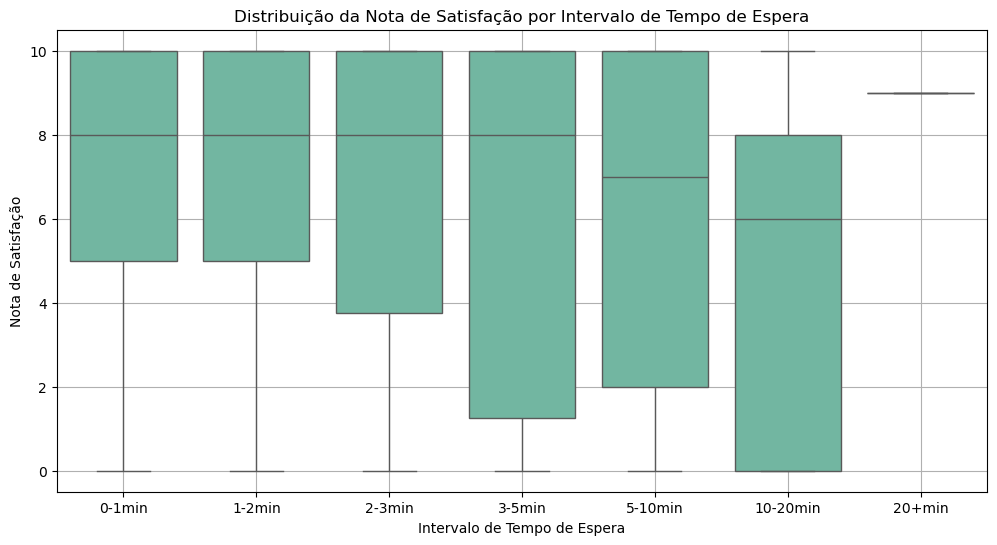

In [23]:
# Adicionando uma coluna de intervalos para o tempo de espera
data['Wait Time Interval'] = pd.cut(data['Customer Wait Time'].dt.total_seconds(), bins=[0, 60, 120, 180, 300, 600, 1200, 3600], labels=['0-1min', '1-2min', '2-3min', '3-5min', '5-10min', '10-20min', '20+min'])

# Boxplot para ver a distribuição das notas de satisfação em relação ao tempo de espera
plt.figure(figsize=(12, 6))
sns.boxplot(x='Wait Time Interval', y='Customer Rating', data=data)
plt.title('Distribuição da Nota de Satisfação por Intervalo de Tempo de Espera')
plt.xlabel('Intervalo de Tempo de Espera')
plt.ylabel('Nota de Satisfação')
plt.grid(True)
plt.show()


## Identificação do Aspecto a Ser Melhorado: Tempo de Espera

Durante as análises exploratórias realizadas no projeto, foram observados diversos padrões que indicam uma relação significativa entre o tempo de espera dos clientes e suas notas de satisfação. Com base nesses dados, o tempo de espera foi identificado como um aspecto crítico a ser melhorado, conforme a etapa "Definir" do ciclo **DMAIC**. As principais observações que levaram a essa conclusão foram:

1. **Análise do Gráfico de Dispersão (Tempo de Espera x Nota de Satisfação)**:
   - O gráfico de dispersão revelou que, à medida que o tempo de espera aumentava, havia uma concentração maior de notas de satisfação zero. Isso sugere uma correlação negativa entre esses dois fatores, indicando que longos tempos de espera podem estar associados a níveis mais baixos de satisfação do cliente.

2. **Boxplot dos Tempos de Espera e Notas de Satisfação**:
   - A análise do boxplot mostrou que nos intervalos de tempo de espera mais curtos, a mediana das notas de satisfação era mais alta. Por outro lado, à medida que o tempo de espera aumentava, a mediana e os quartis inferiores das notas de satisfação diminuíam. Isso sugere que a experiência do cliente se deteriora conforme o tempo de espera aumenta.

3. **Relevância para Melhoria Contínua**:
   - Diante desses dados, o tempo de espera se apresenta como um ponto crítico para a melhoria contínua do processo, alinhando-se aos princípios do Lean Six Sigma. A redução dos tempos de espera pode levar a um aumento na satisfação do cliente, impactando positivamente a experiência geral.

Com isso, o tempo de espera foi definido como o aspecto a ser melhorado na fase "Definir" do DMAIC. As próximas etapas envolverão a análise detalhada das notas de satisfação por horário do dia na fase "Medir" (M).


In [27]:
# Certificando de que a coluna 'Transaction Start Date' está no formato datetime
data['Transaction Start Date'] = pd.to_datetime(data['Transaction Start Date'])

# Extraindo a hora da coluna
data['Hour'] = data['Transaction Start Date'].dt.hour


In [29]:
# Calculando a média das notas de satisfação por hora
average_satisfaction_by_hour = data.groupby('Hour')['Customer Rating'].mean().reset_index()


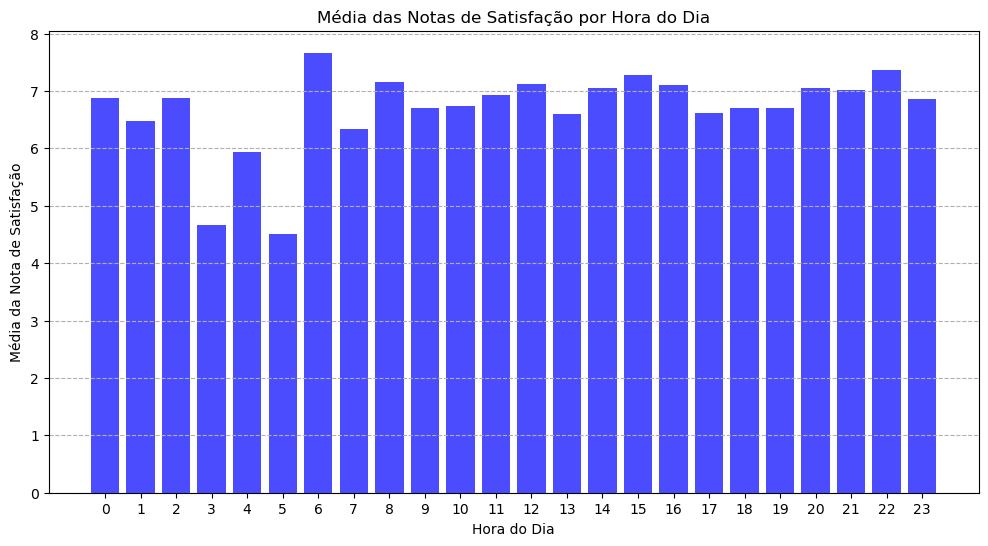

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(average_satisfaction_by_hour['Hour'], average_satisfaction_by_hour['Customer Rating'], color='blue', alpha=0.7)
plt.title('Média das Notas de Satisfação por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Média da Nota de Satisfação')
plt.xticks(average_satisfaction_by_hour['Hour'])  # Para garantir que todas as horas sejam mostradas
plt.grid(axis='y', linestyle='--')
plt.show()


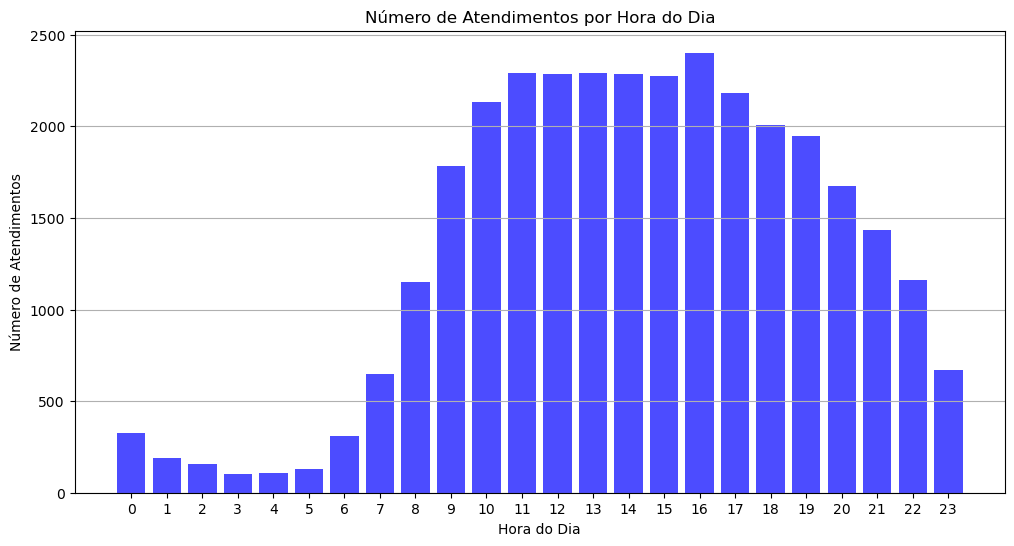

In [33]:
import matplotlib.pyplot as plt

# Extraindo a hora de início da transação
data['Hour'] = data['Transaction Start Date'].dt.hour  # Ajuste o nome da coluna, se necessário

# Contando atendimentos por hora
attendances_per_hour = data['Hour'].value_counts().sort_index()

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.bar(attendances_per_hour.index, attendances_per_hour.values, color='blue', alpha=0.7)
plt.title('Número de Atendimentos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Atendimentos')
plt.xticks(range(24))  # Exibir todas as horas
plt.grid(axis='y')
plt.show()


In [35]:
# Filtrando os atendimentos entre 3h e 5h
attendances_3_to_5 = data[(data['Hour'] >= 3) & (data['Hour'] < 5)]

# Contando o total de atendimentos nesse intervalo
total_attendances_3_to_5 = len(attendances_3_to_5)

# Contando quantos desses atendimentos foram avaliados (com nota de satisfação)
evaluated_attendances_3_to_5 = attendances_3_to_5[attendances_3_to_5['Customer Rating'].notnull()]
total_evaluated_3_to_5 = len(evaluated_attendances_3_to_5)

# Exibindo os resultados
print(f'Total de atendimentos entre 3h e 5h: {total_attendances_3_to_5}')
print(f'Total de atendimentos avaliados entre 3h e 5h: {total_evaluated_3_to_5}')


Total de atendimentos entre 3h e 5h: 209
Total de atendimentos avaliados entre 3h e 5h: 26


In [37]:
import pandas as pd

data['Hour'] = data['Transaction Start Date'].dt.hour  # Extraindo a hora do tempo de início

# Total de atendimentos por hora
total_attendimentos_por_hora = data.groupby('Hour').size().reset_index(name='Total Atendimento')

# Total de avaliações por hora
avaliacoes_por_hora = data[data['Customer Rating'].notnull()].groupby('Hour').size().reset_index(name='Total Avaliações')

# Mesclando os dois DataFrames para ter uma visão consolidada
resultados = pd.merge(total_attendimentos_por_hora, avaliacoes_por_hora, on='Hour', how='left')

# Preenchendo valores NaN com 0 (caso não haja avaliações em alguma hora)
resultados['Total Avaliações'] = resultados['Total Avaliações'].fillna(0)

# Calculando a porcentagem de avaliações
resultados['Porcentagem Avaliações'] = (resultados['Total Avaliações'] / resultados['Total Atendimento']) * 100

# Exibindo os resultados
print(resultados)


    Hour  Total Atendimento  Total Avaliações  Porcentagem Avaliações
0      0                327                41               12.538226
1      1                187                32               17.112299
2      2                157                16               10.191083
3      3                101                12               11.881188
4      4                108                14               12.962963
5      5                131                 8                6.106870
6      6                312                33               10.576923
7      7                649                73               11.248074
8      8               1148               160               13.937282
9      9               1785               294               16.470588
10    10               2134               325               15.229616
11    11               2294               373               16.259808
12    12               2286               365               15.966754
13    13            

## Análise das Notas de Satisfação por Horário do Dia

Nesta etapa do projeto, realizamos uma análise das notas de satisfação dos atendimentos em relação ao horário do dia. O objetivo foi entender se existiam padrões que pudessem indicar problemas ou oportunidades de melhoria no atendimento ao cliente.

### Resultados

Após calcular a média das notas de satisfação para cada hora do dia, observamos que o intervalo entre **3h e 5h** teve as menores médias de satisfação, com notas de **4.7**, **5.9** e **4.5**. No entanto, ao analisar mais a fundo, encontramos que:

- **Total de atendimentos entre 3h e 5h**: 209
- **Total de atendimentos avaliados entre 3h e 5h**: 26

### Conclusão

Com base nos dados, concluímos que as menores notas no período de **3h a 5h** não são tão relevantes, uma vez que há um baixo número de avaliações. Além disso, sabemos que clientes insatisfeitos tendem a avaliar mais frequentemente do que clientes satisfeitos, o que pode distorcer a percepção geral da qualidade do atendimento.

Portanto, as análises sugerem que devemos ter cautela ao interpretar as notas de satisfação desse intervalo específico, já que as avaliações podem não refletir a experiência real dos clientes. Essa análise preliminar sobre as notas de satisfação será útil para a compreensão do impacto do tempo de espera nas experiências dos clientes, que será abordada na próxima f
ão do cliente.


In [39]:
import pandas as pd


data['Hour'] = data['Transaction Start Date'].dt.hour  # Extraindo a hora


In [41]:
# Calculando a média do tempo de espera por hora
average_wait_time_by_hour = data.groupby('Hour')['Customer Wait Time'].mean().reset_index()

# Convertendo o tempo de espera para segundos, se necessário
average_wait_time_by_hour['Customer Wait Time'] = average_wait_time_by_hour['Customer Wait Time'].dt.total_seconds()


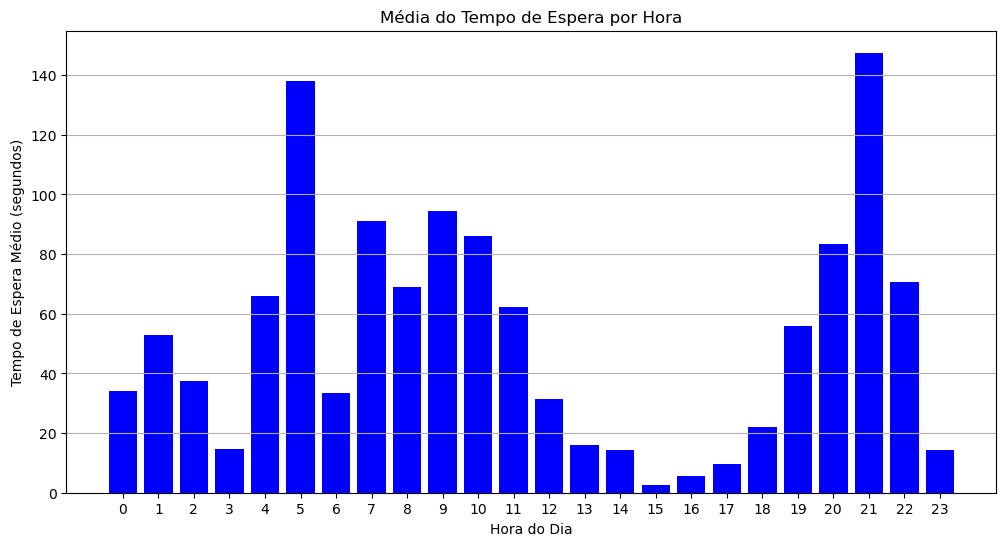

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(average_wait_time_by_hour['Hour'], average_wait_time_by_hour['Customer Wait Time'], color='blue')
plt.title('Média do Tempo de Espera por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Tempo de Espera Médio (segundos)')
plt.xticks(range(24))  # Para mostrar todas as horas
plt.grid(axis='y')
plt.show()


In [45]:
import pandas as pd

# Agrupando por hora e contando o número de agentes únicos
agents_per_hour = data.groupby('Hour')['Agent'].nunique()

# Convertendo a Série resultante em um dicionário
agents_per_hour_dict = agents_per_hour.to_dict()

# Exibindo o dicionário para verificação
print(agents_per_hour_dict)


{0: 94, 1: 73, 2: 57, 3: 35, 4: 27, 5: 38, 6: 75, 7: 142, 8: 238, 9: 356, 10: 448, 11: 470, 12: 552, 13: 579, 14: 630, 15: 599, 16: 627, 17: 565, 18: 543, 19: 447, 20: 374, 21: 299, 22: 290, 23: 244}


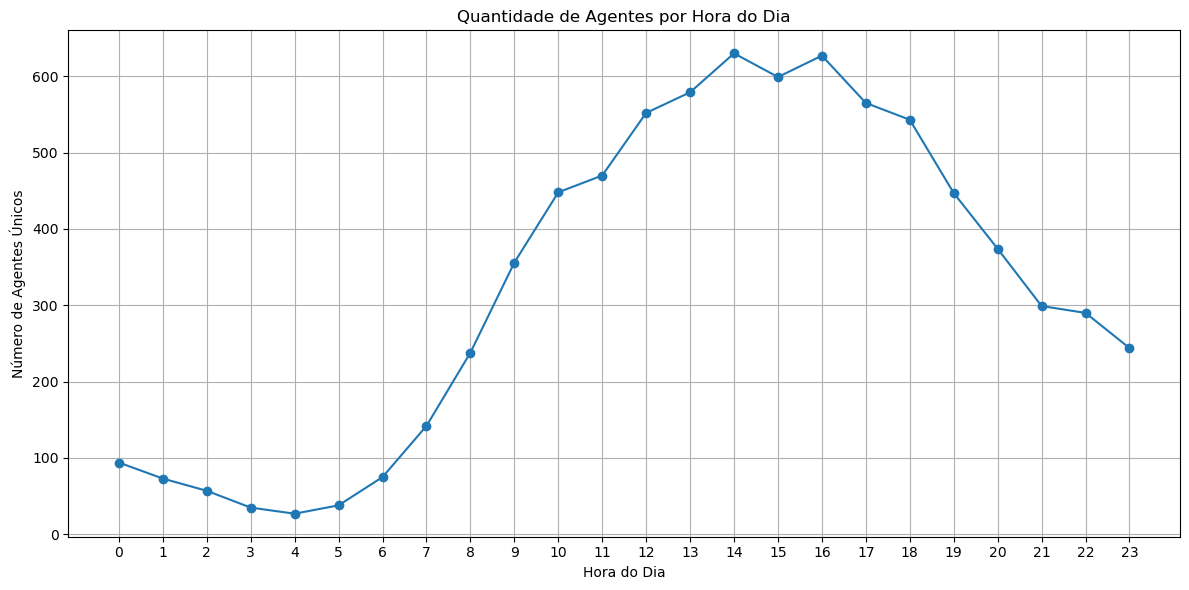

In [47]:
import matplotlib.pyplot as plt

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(agents_per_hour.index, agents_per_hour.values, marker='o', color='tab:blue')
plt.title('Quantidade de Agentes por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Agentes Únicos')
plt.xticks(agents_per_hour.index)  # Marca cada hora no eixo x
plt.grid()
plt.tight_layout()
plt.show()



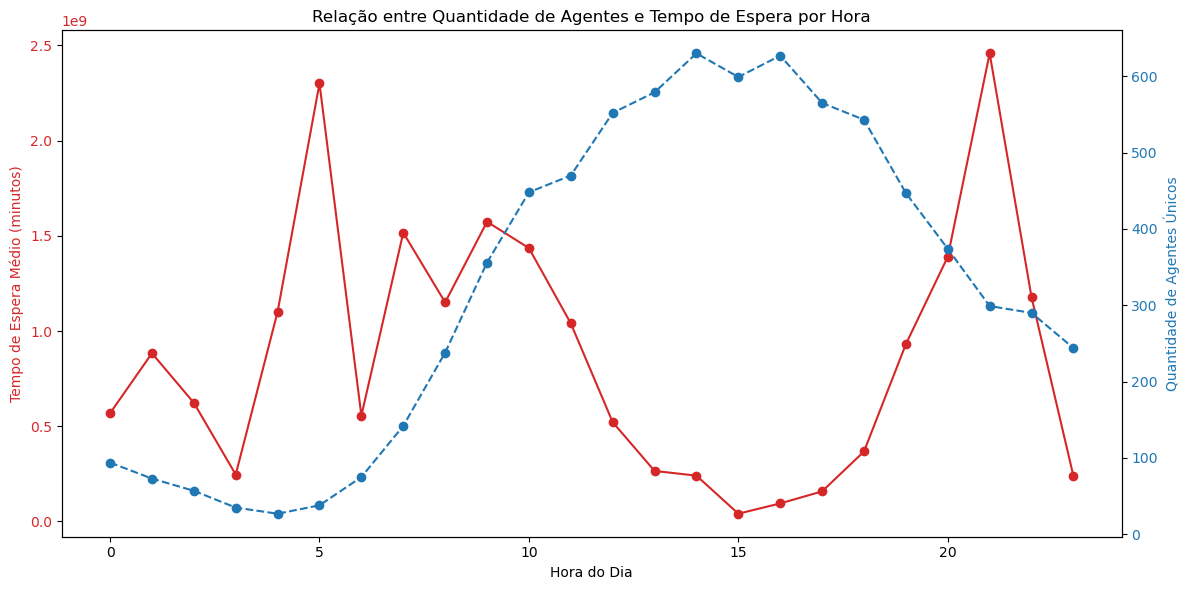

In [49]:
import matplotlib.pyplot as plt

# Calculando o tempo de espera médio por hora em minutos
wait_time_per_hour = data.groupby('Hour')['Customer Wait Time'].mean() / 60  # Convertendo de segundos para minutos

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de linha para tempo de espera (lado esquerdo)
ax1.set_xlabel('Hora do Dia')
ax1.set_ylabel('Tempo de Espera Médio (minutos)', color='tab:red')
ax1.plot(wait_time_per_hour.index, wait_time_per_hour.values, color='tab:red', marker='o', label='Tempo de Espera')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Criando um segundo eixo para o gráfico de quantidade de agentes
ax2 = ax1.twinx()  
ax2.set_ylabel('Quantidade de Agentes Únicos', color='tab:blue')
ax2.plot(agents_per_hour.index, agents_per_hour.values, color='tab:blue', marker='o', linestyle='--', label='Agentes Disponíveis')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Relação entre Quantidade de Agentes e Tempo de Espera por Hora')
fig.tight_layout()
plt.show()


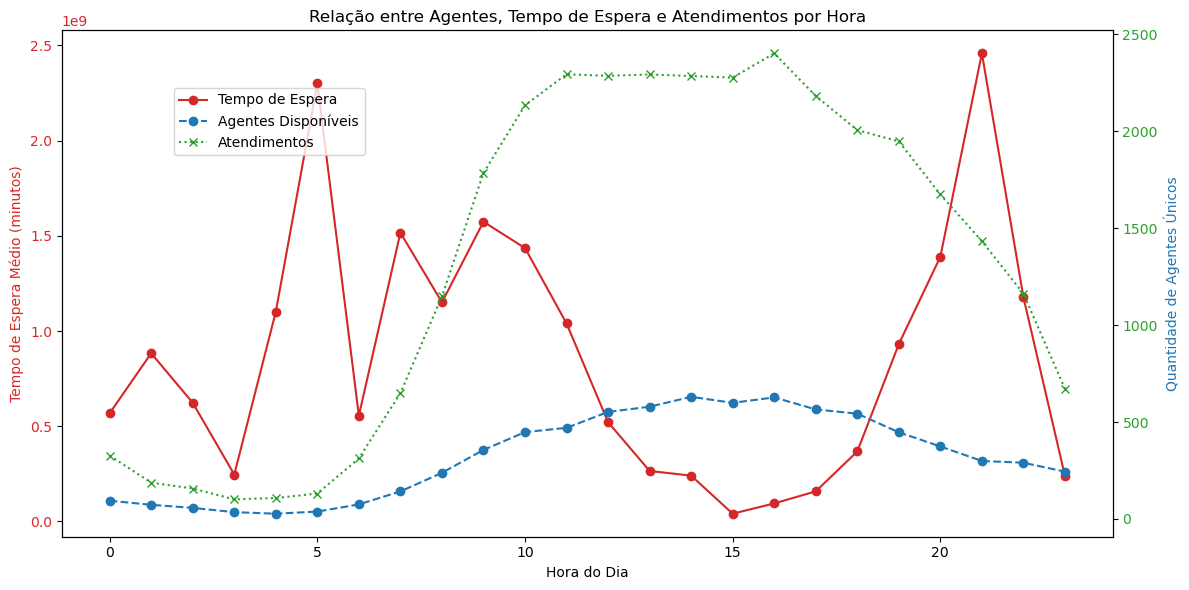

In [51]:
import matplotlib.pyplot as plt

# Calcular o tempo de espera médio por hora em minutos
wait_time_per_hour = data.groupby('Hour')['Customer Wait Time'].mean() / 60  # Convertendo de segundos para minutos

# Calcular a quantidade de atendimentos por hora
attendances_per_hour = data.groupby('Hour')['Session Name'].count()  # Contando atendimentos

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de linha para tempo de espera (lado esquerdo)
ax1.set_xlabel('Hora do Dia')
ax1.set_ylabel('Tempo de Espera Médio (minutos)', color='tab:red')
ax1.plot(wait_time_per_hour.index, wait_time_per_hour.values, color='tab:red', marker='o', label='Tempo de Espera')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Criando um segundo eixo para o gráfico de quantidade de agentes
ax2 = ax1.twinx()  
ax2.set_ylabel('Quantidade de Agentes Únicos', color='tab:blue')
ax2.plot(agents_per_hour.index, agents_per_hour.values, color='tab:blue', marker='o', linestyle='--', label='Agentes Disponíveis')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Adicionando a linha de quantidade de atendimentos
ax2.plot(attendances_per_hour.index, attendances_per_hour.values, color='tab:green', marker='x', linestyle=':', label='Atendimentos')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Adicionando legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), bbox_transform=ax1.transAxes)

plt.title('Relação entre Agentes, Tempo de Espera e Atendimentos por Hora')
fig.tight_layout()
plt.show()


## Análise de Dados: Tempo de Espera e Agentes

### Fase de Medição (M)

Durante a fase de Medição, identificamos o tempo de espera como um fator crítico para a satisfação do cliente. A partir dessa descoberta, avançamos para a fase de Análise, onde exploraremos as causas desse problema e entenderemos como ele se relaciona com a quantidade de agentes disponíveis e o volume de atendimentos ao longo do dia.

### Fase de Análise (A)

Na fase de Análise, utilizamos os dados para investigar os principais fatores que afetam o tempo de espera e, consequentemente, a experiência do cliente. Os gráficos a seguir ilustram essas relações e fornecem insights para apoiar a fase seguinte, de Melhoria.

### Gráfico 1: Média do Tempo de Espera por Hora

O primeiro gráfico apresenta a média do tempo de espera dos clientes ao longo das 24 horas do dia. Observou-se que o tempo de espera varia significativamente durante o dia, com picos durante a noite e madrugada, especialmente entre 3h e 5h.

### Gráfico 2: Quantidade de Agentes por Hora do Dia

O segundo gráfico mostra a quantidade de agentes disponíveis ao longo das horas do dia. Há uma maior concentração de agentes durante os horários de pico, coincidente com o aumento no volume de atendimentos, o que sugere uma distribuição eficiente da equipe em relação à demanda.

### Gráfico 3: Relação entre Quantidade de Agentes e Tempo de Espera por Hora

No terceiro gráfico, investigamos a relação entre a quantidade de agentes e o tempo de espera. Verificamos uma correlação inversa entre esses dois fatores: à medida que o número de agentes aumenta, o tempo de espera tende a diminuir, confirmando que a disponibilidade de agentes é um fator crucial na otimização do atendimento.

### Gráfico 4: Relação entre Agentes, Tempo de Espera e Atendimentos por Hora

O quarto gráfico integra três variáveis: quantidade de agentes, tempo de espera e número de atendimentos por hora. Mesmo em períodos de maior volume de atendimentos (entre 11h e 18h), o tempo de espera médio se mantém relativamente baixo, sugerindo uma gestão eficaz da equipe nesses horários de maior demanda.

### Conclusões da Fase de Análise (A)

Na fase de Análise, também investigamos as menores médias de satisfação do cliente, registradas entre 3h e 5h da madrugada. Identificamos que esse período apresenta um número reduzido de atendimentos e menos agentes disponíveis, o que resulta em tempos de espera maiores e, possivelmente, em maior insatisfação. Esse período crítico pode ser associado a eventos como perda de voos ou questões relacionadas a bagagens, problemas típicos de clientes de companhias aéreas nesse horário.

Com base nessas análises, a fase de Análise nos oferece uma compreensão clara das causas dos altos tempos de espera em horários menos convencionais. Isso nos leva a considerar a realocação de agentes durante os períodos de menor atividade como uma potencial estratégia de melhoria, que será explorclientes.
e em períodos críticos.


In [53]:
# Agrupando o tempo de espera por hora
wait_time_by_hour = data.groupby(data['Transaction Start Date'].dt.hour)['Customer Wait Time'].mean().reset_index()

# Renomeando as colunas
wait_time_by_hour.columns = ['Hour', 'Average Wait Time']

# Exibindo os resultados
print(wait_time_by_hour)


    Hour         Average Wait Time
0      0 0 days 00:00:34.110091743
1      1           0 days 00:00:53
2      2 0 days 00:00:37.388535031
3      3 0 days 00:00:14.782178217
4      4 0 days 00:01:06.083333333
5      5 0 days 00:02:18.030534351
6      6 0 days 00:00:33.330128205
7      7 0 days 00:01:30.989214175
8      8 0 days 00:01:09.039198606
9      9 0 days 00:01:34.429691876
10    10 0 days 00:01:26.137769447
11    11 0 days 00:01:02.405841325
12    12 0 days 00:00:31.283464566
13    13 0 days 00:00:15.916703009
14    14 0 days 00:00:14.440262582
15    15 0 days 00:00:02.447079490
16    16 0 days 00:00:05.695253955
17    17 0 days 00:00:09.477543538
18    18 0 days 00:00:22.054835493
19    19 0 days 00:00:55.878336755
20    20 0 days 00:01:23.397252090
21    21 0 days 00:02:27.490579204
22    22 0 days 00:01:10.661790017
23    23 0 days 00:00:14.324888226


In [55]:
# Agrupando o tempo de espera por agente
wait_time_by_agent = data.groupby('Agent')['Customer Wait Time'].mean().reset_index()

# Ordenando para encontrar os agentes com maior tempo de espera
wait_time_by_agent = wait_time_by_agent.sort_values(by='Customer Wait Time', ascending=False)

# Exibindo os 20 agentes com maior tempo de espera
print(wait_time_by_agent.head(20))


       Agent        Customer Wait Time
97    Arthur           0 days 00:12:52
946     Toby 0 days 00:07:39.333333333
221  Clement 0 days 00:07:17.666666666
286    Drake           0 days 00:07:11
990    Wilma 0 days 00:05:59.738095238
295    Dylan           0 days 00:05:50
156  Braylon 0 days 00:05:42.791666666
209    Chloe 0 days 00:05:39.307692307
588    Lilly    0 days 00:04:44.100000
693     Myla 0 days 00:04:35.181818181
520     Kath 0 days 00:04:32.666666666
144    Blake           0 days 00:04:31
764     Quaz 0 days 00:04:24.948717948
174  Calvert 0 days 00:04:19.862068965
930   Thelma    0 days 00:04:17.300000
65    Anchor 0 days 00:04:08.636363636
247    Darek           0 days 00:04:04
546      Kit 0 days 00:04:03.181818181
995   Yandel    0 days 00:04:01.500000
579  Leonard 0 days 00:04:01.135135135


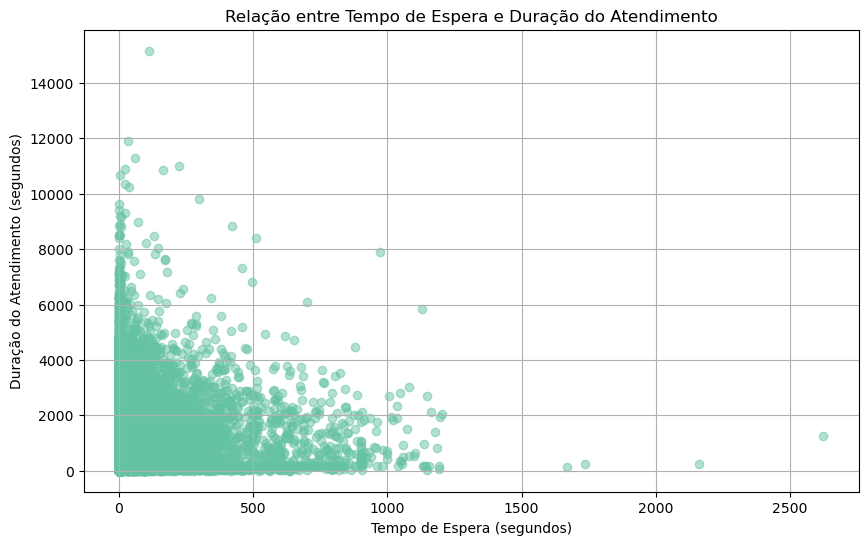

In [57]:
# Criando um gráfico de dispersão
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Customer Wait Time'].dt.total_seconds(), data['Chat Duration'].dt.total_seconds(), alpha=0.5)
plt.title('Relação entre Tempo de Espera e Duração do Atendimento')
plt.xlabel('Tempo de Espera (segundos)')
plt.ylabel('Duração do Atendimento (segundos)')
plt.grid()
plt.show()


In [59]:
# Agrupando o tempo de espera por se a transação foi encaminhada
wait_time_transferred = data.groupby('Transferred Chat')['Customer Wait Time'].mean().reset_index()

# Renomeando as colunas
wait_time_transferred.columns = ['Transferred Chat', 'Average Wait Time']

# Exibindo os resultados
print(wait_time_transferred)


   Transferred Chat         Average Wait Time
0             False 0 days 00:00:40.088599105
1              True 0 days 00:01:17.978286384


In [61]:
# Agrupando os dados pela coluna Customer Comment
analysis = data.groupby('Customer Comment').agg(
    average_satisfaction=('Customer Rating', 'mean'),  # Média da nota de satisfação
    average_wait_time=('Customer Wait Time', 'mean')   # Média do tempo de espera
).reset_index()

# Exibindo a análise
print(analysis)


               Customer Comment  average_satisfaction  \
0                                            6.561983   
1               Did Not Resolve              1.871508   
2  Multiple Contacts to Resolve              7.128878   
3                   No question              6.616505   
4                      Not sure              5.716381   
5                  Yes Resolved              8.876650   

          average_wait_time  
0 0 days 00:00:46.867630249  
1 0 days 00:01:14.319230769  
2 0 days 00:00:48.511363636  
3 0 days 00:00:14.389988358  
4 0 days 00:00:46.735224586  
5 0 days 00:00:39.528553027  


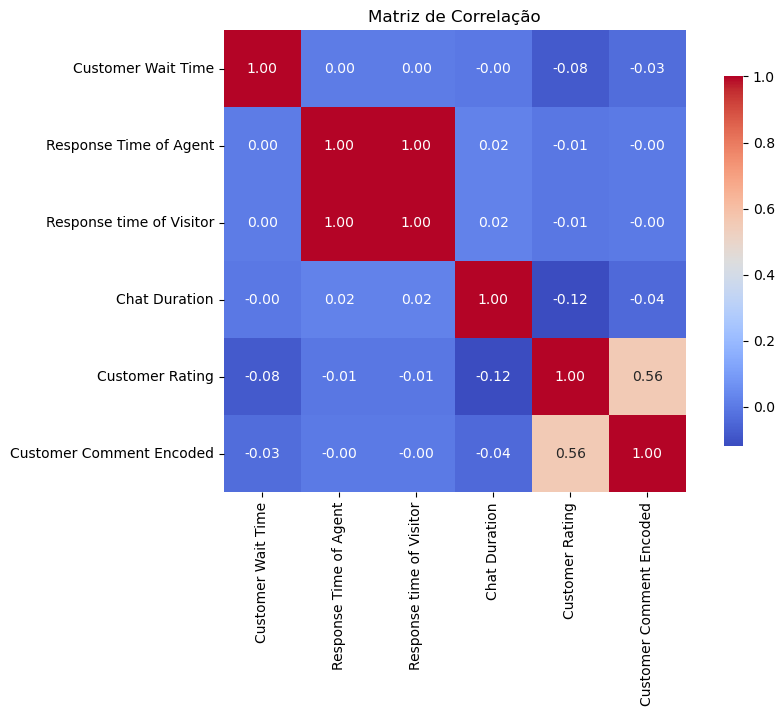

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecione as colunas de interesse
# Para o Customer Comment, considere codificá-lo em variáveis numéricas, se necessário
# Exemplo de codificação simples (apenas se você quiser incluir essa coluna)
data['Customer Comment Encoded'] = data['Customer Comment'].map({
    'Yes Resolved': 1,
    'Did Not Resolve': -1,
    'Not sure': 0,
    'No question': 0,
    'Multiple Contacts to Resolve': -1,
    ' ': 0  # Para valores em branco
})

# Selecione as colunas relevantes para a correlação
correlation_columns = [
    'Customer Wait Time', 
    'Response Time of Agent', 
    'Response time of Visitor', 
    'Chat Duration', 
    'Customer Rating', 
    'Customer Comment Encoded'
]
correlation_matrix = data[correlation_columns].corr()

# Plotando o gráfico de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação')
plt.show()


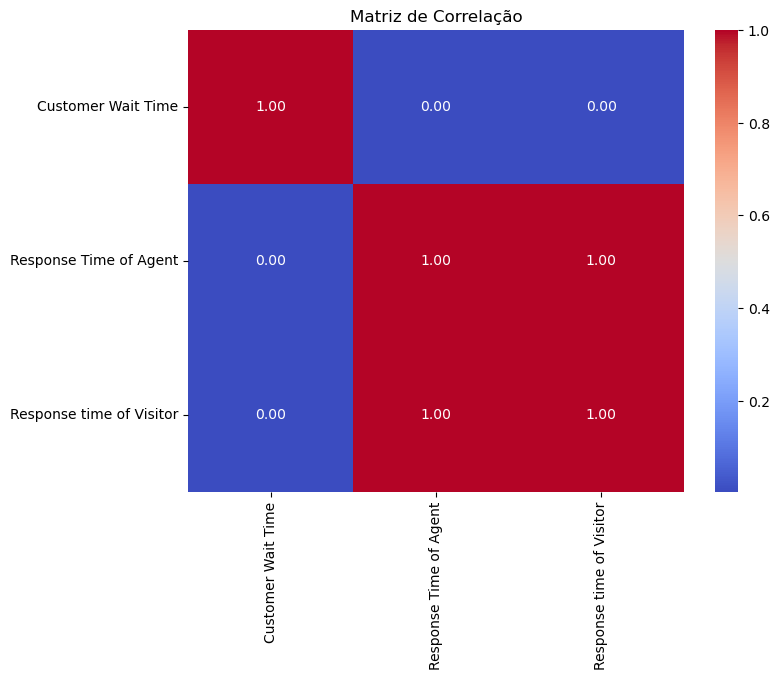

In [65]:
correlation_matrix = data[['Customer Wait Time', 'Response Time of Agent', 'Response time of Visitor']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


In [67]:
# Calculando a média de notas de satisfação e a contagem de transferidos e não transferidos
average_rating_transfer = data.groupby('Transferred Chat').agg(
    Average_Satisfaction=('Customer Rating', 'mean'),
    Count=('Customer Rating', 'size')
).reset_index()

# Renomeando as colunas para melhor entendimento
average_rating_transfer.columns = ['Transferred Chat', 'Average Satisfaction Rating', 'Count']

# Exibindo os resultados
print(average_rating_transfer)



   Transferred Chat  Average Satisfaction Rating  Count
0             False                     7.127654  26840
1              True                     6.267319   5112


In [69]:
# Extraindo a hora da coluna 'Transaction Start Date'
data['Hour'] = data['Transaction Start Date'].dt.hour

# Contando o número de transferências por hora
transfers_per_hour = data.groupby(['Hour', 'Transferred Chat']).size().unstack(fill_value=0)

# Calculando a porcentagem de transferências em cada hora
transfers_percentage = transfers_per_hour.div(transfers_per_hour.sum(axis=1), axis=0) * 100

# Exibindo o resultado
print(transfers_percentage)


Transferred Chat      False      True 
Hour                                  
0                 88.990826  11.009174
1                 90.909091   9.090909
2                 95.541401   4.458599
3                 91.089109   8.910891
4                 91.666667   8.333333
5                 94.656489   5.343511
6                 91.025641   8.974359
7                 87.827427  12.172573
8                 83.972125  16.027875
9                 82.408964  17.591036
10                83.739456  16.260544
11                82.040105  17.959895
12                84.339458  15.660542
13                83.558657  16.441343
14                82.363239  17.636761
15                83.443127  16.556873
16                81.765196  18.234804
17                83.088909  16.911091
18                82.851446  17.148554
19                83.675565  16.324435
20                85.185185  14.814815
21                86.322401  13.677599
22                87.177281  12.822719
23                87.1833

## Segunda Onda de Análises: Investigando Tempo de Espera e Transferências

### Continuação da Fase de Análise (A)

Após a análise inicial de tempo de espera, quantidade de agentes e o volume de atendimentos ao longo do dia, avançamos para uma segunda onda de investigação, aprofundando aspectos mais específicos relacionados ao tempo de espera e sua relação com as transferências de chat e o feedback dos clientes.

### Análise do Tempo de Espera por Agente e Horário

- **Tempo de Espera por Agente**: Exploramos o tempo médio de espera de cada agente, o que nos permitiu identificar agentes que podem estar enfrentando maiores dificuldades em gerenciar seu fluxo de trabalho. Essa análise é importante para futuras propostas de capacitação ou realocação de recursos.

- **Tempo de Espera por Horário**: Revisitamos o tempo de espera ao longo do dia para entender com mais precisão os picos e como eles se relacionam com os outros fatores em análise.

### Gráfico de Relação entre Tempo de Espera e Duração do Atendimento

Verificamos também a correlação entre o **tempo de espera** e a **duração do atendimento**, explorando se tempos de atendimento mais longos poderiam estar relacionados a maiores tempos de espera. No entanto, a relação entre essas variáveis não apresentou uma correlação significativa, sugerindo que o tempo de espera está mais relacionado a outras variáveis, como disponibilidade de agentes ou transferências.

### Impacto das Transferências no Tempo de Espera

- **Análise de Chats Transferidos**: Foi observado que as transferências resultam em tempos de espera significativamente maiores. Em média, um atendimento transferido tem um tempo de espera quase o dobro do que um atendimento não transferido.
  
  - **Tempo Médio de Espera para Chats Transferidos**: 1 minuto e 17 segundos.
  - **Tempo Médio de Espera para Chats Não Transferidos**: 40 segundos.

- **Nota de Satisfação e Transferências**: A análise da média de satisfação mostra que atendimentos transferidos tendem a ter uma nota de satisfação menor. 

  - **Nota Média para Chats Não Transferidos**: 7.13
  - **Nota Média para Chats Transferidos**: 6.26

Isso indica que, além do maior tempo de espera, os clientes que passam por uma transferência podem ter uma experiência mais frustrante, o que impacta diretamente a satisfação.

### Análise de 'Customer Comment' e Relação com Tempo de Espera

Exploramos a relação entre as respostas de 'Customer Comment' (feedbacks pré-definidos) e o tempo de espera, bem como a nota de satisfação. Essa investigação mostrou que as transferências e tempos de espera mais longos estão frequentemente associados a comentários como **"Did Not Resolve"** ou **"Not Sure"**, enquanto feedbacks mais positivos, como **"Yes Resolved"**, ocorrem com menor tempo de espera.

### Mapa de Calor: Correlação entre Variáveis

Utilizamos um gráfico de calor para visualizar as correlações entre diferentes variáveis do dataset, como tempo de espera, satisfação do cliente, tempo de resposta do agente e do cliente, e o feedback. A correlação mais significativa que encontramos foi entre **tempo de espera** e **Customer Comment (encoded)**, com um coeficiente de correlação de **0.56**, indicando uma relação moderada entre os dois. Isso reforça a importância de melhorar o tempo de espera para aumentar a satisfação do cliente.

### Percentual de Transferências ao Longo do Dia

Também analisamos a distribuição de atendimentos transferidos ao longo das 24 horas do dia. Identificamos que, embora o número absoluto de transferências seja menor durante a madrugada, as transferências representam uma porcentagem maior dos atendimentos totais nesse período, o que pode agravar os tempos de espera e a insatisfação nesse horário.

---

## Conclusão da Fase de Análise (A)

Durante a fase de **Análise (A)** do **DMAIC**, focamos em entender as causas dos maiores tempos de espera e sua relação com a satisfação do cliente. Através das análises realizadas, destacamos os seguintes pontos críticos:

1. **Transferências de Atendimento**: As transferências de chat aumentam significativamente o tempo de espera, levando a notas de satisfação mais baixas. Isso sugere que uma estratégia de melhoria deveria incluir a redução do número de transferências ou a otimização do processo de transferências para torná-lo mais ágil.

2. **Horários Críticos**: O período entre 3h e 5h da madrugada foi novamente identificado como o de pior performance em termos de tempo de espera e satisfação, mesmo com um baixo volume de atendimentos. A realocação de agentes ou a criação de processos mais eficientes para atender clientes nesse horário pode ser uma oportunidade de melhoria.

3. **Relação entre Tempo de Espera e Comentários Negativos**: Observou-se que maiores tempos de espera estão fortemente associados a comentários negativos, como "Did Not Resolve" ou "Not Sure". Isso reforça a importância de reduzir os tempos de espera para melhorar a percepção do serviço.

Com essas constatações, estamos prontos para avançar para a fase de **Implementação (I)**, onde começaremos a propor soluções para otimizar o tempo de espera e melhorar a experiência do cliente.


## Etapa de Implementação (I)

Com base nas descobertas da fase de Análise, propomos as seguintes soluções para otimizar o tempo de espera e melhorar a satisfação do cliente. **Importante ressaltar que, como se trata de um dataset obtido na internet e não há envolvimento direto com a empresa, as recomendações a seguir são de natureza hipotética.**

### 1. Redução de Transferências
- **Proposta**: Capacitar os agentes para lidar com um maior número de tipos de solicitação, minimizando a necessidade de transferências.
- **Justificativa**: Transferências aumentam o tempo de espera, o que leva à diminuição da nota de satisfação do cliente.

- **Adendo: Revisão da Autonomia dos Agentes**
  - **Proposta**: Avaliar se os agentes possuem autonomia suficiente para resolver a maioria dos problemas dos clientes sem recorrer a processos burocráticos ou transferências. Isso inclui questionar se as alçadas e permissões no sistema são adequadas e se o escopo do trabalho dos agentes pode ser ampliado.
  - **Justificativa**: Processos rígidos e a falta de autonomia dos agentes podem estar contribuindo para o aumento de transferências, o que afeta o tempo de espera e a satisfação do cliente. Revisar essas questões pode otimizar os processos e reduzir a necessidade de transferir atendimentos.

### 2. Reforço de Agentes em Horários Críticos
- **Proposta**: Realocar agentes para aumentar a equipe durante o período crítico das 3h às 5h da madrugada, identificados como horários de maior insatisfação e maior tempo de espera.
- **Justificativa**: A baixa quantidade de atendimentos nesses horários pode estar mascarando um problema de alocação de recursos.

### 3. Otimização do Processo de Transferências
- **Proposta**: Criar uma equipe especializada para lidar com transferências de forma mais ágil ou desenvolver processos que acelerem o atendimento nessas situações.
- **Justificativa**: O tempo adicional necessário para transferir um atendimento aumenta o tempo total de espera, impactando diretamente a experiência do cliente.

### 4. Monitoramento Pró-ativo de Satisfação
- **Proposta**: Implementar alertas automáticos que avisam aos gerentes quando o CSAT começa a cair, permitindo uma correção em tempo real.
- **Justificativa**: A correção proativa de problemas pode melhorar o desempenho antes que a insatisfação se intensifique, especialmente em horários críticos.

---

## Ressalva Importante

É necessário destacar que, como o dataset utilizado neste estudo foi retirado de uma fonte externa (internet), e não há envolvimento direto com os processos da empresa em questão, todas as recomendações acima, bem como as implementações propostas, têm caráter **hipotético**. Elas foram elaboradas com base em análises de dados disponíveis e em suposições comuns ao setor de atendimento ao cliente, mas sem o contexto interno da empresa ou a possibilidade de validação empírica dessas hipóteses.


## Etapa de Controle (C)

Para garantir a eficácia contínua das melhorias implementadas, propomos as seguintes ações de controle:

### 1. Monitoramento Contínuo
- **Proposta**: Desenvolver um dashboard em tempo real para monitorar o tempo de espera, transferências e satisfação do cliente.
- **Justificativa**: O monitoramento contínuo permitirá identificar rapidamente qualquer desvio dos padrões estabelecidos e reagir de maneira ágil.

### 2. Revisões Periódicas
- **Proposta**: Realizar revisões mensais dos dados coletados para avaliar a eficácia das mudanças e ajustar os processos conforme necessário.
- **Justificativa**: Manter o acompanhamento e ajuste contínuo garante que as melhorias continuem surtindo o efeito esperado.

### 3. Capacitação Contínua
- **Proposta**: Continuar a capacitação dos agentes, com foco em habilidades de resolução de problemas e eficiência no atendimento.
- **Justificativa**: Manter os agentes atualizados e treinados é essencial para garantir que as mudanças se mantenham no longo prazo.
